## Task 05:

### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#Load the Dataset
df = pd.read_csv('RTA Dataset.csv')

In [91]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [92]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [94]:
df.shape

(12316, 32)

In [95]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [96]:
# Drop columns with a high percentage of missing values
df_cleaned = df.drop(columns=['Service_year_of_vehicle', 'Fitness_of_casuality', 'Work_of_casuality','Defect_of_vehicle', 'Vehicle_driver_relation', 'Owner_of_vehicle'])

In [97]:
df_cleaned['Type_of_vehicle'].fillna('Unknown', inplace=True)
df_cleaned['Driving_experience'].fillna('Unknown', inplace=True)

In [98]:
# Convert 'Time' column to datetime
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S').dt.time

In [99]:
# Add 'Hour' column to the cleaned dataset
df_cleaned['Hour'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S').dt.hour

In [100]:
df_cleaned.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Residential areas,NaN,Tangent road with flat terrain,...,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,17
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,...,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,17
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Recreational areas,other,NaN,...,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,01:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,...,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,01:06:00,Sunday,18-30,Male,Junior high school,2-5yr,Unknown,Industrial areas,other,Tangent road with flat terrain,...,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,1


In [101]:
df_cleaned.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour'],
      dtype='object')

## Exploratory Data Analysis (EDA)

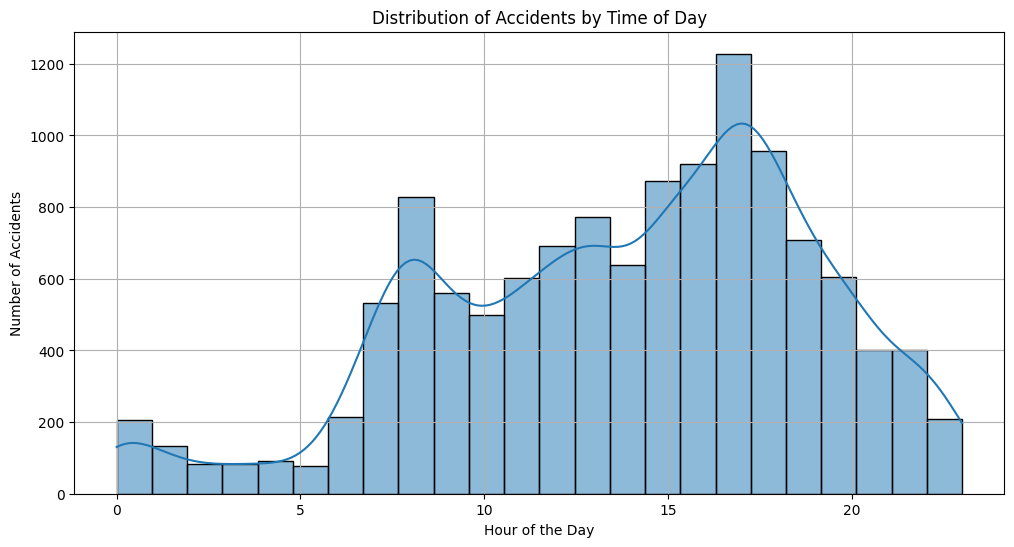

In [102]:
# Distribution of Accidents by Time of Day
df_cleaned['Hour'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Hour'], bins=24, kde=True)
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

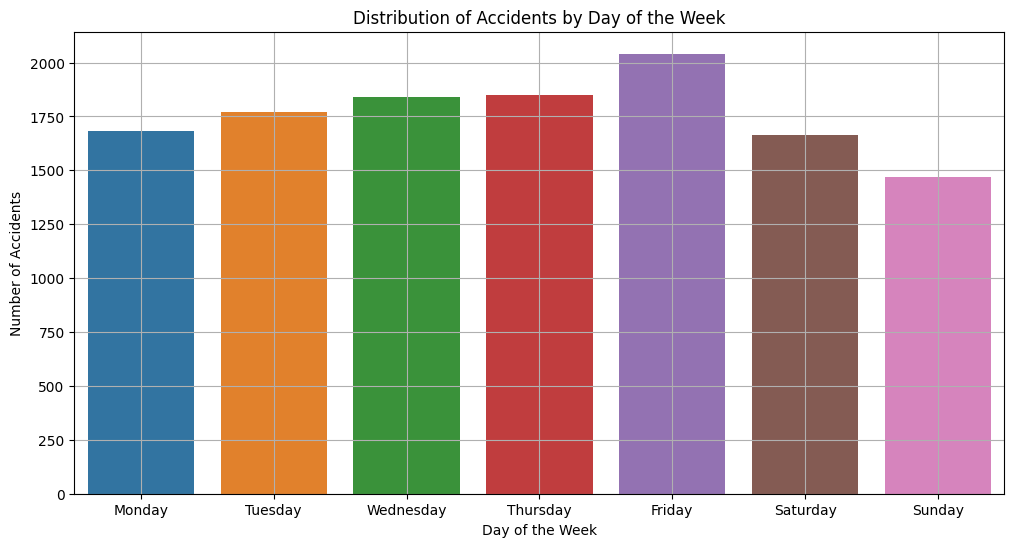

In [103]:
# Distribution of Accidents by Day of the Week
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

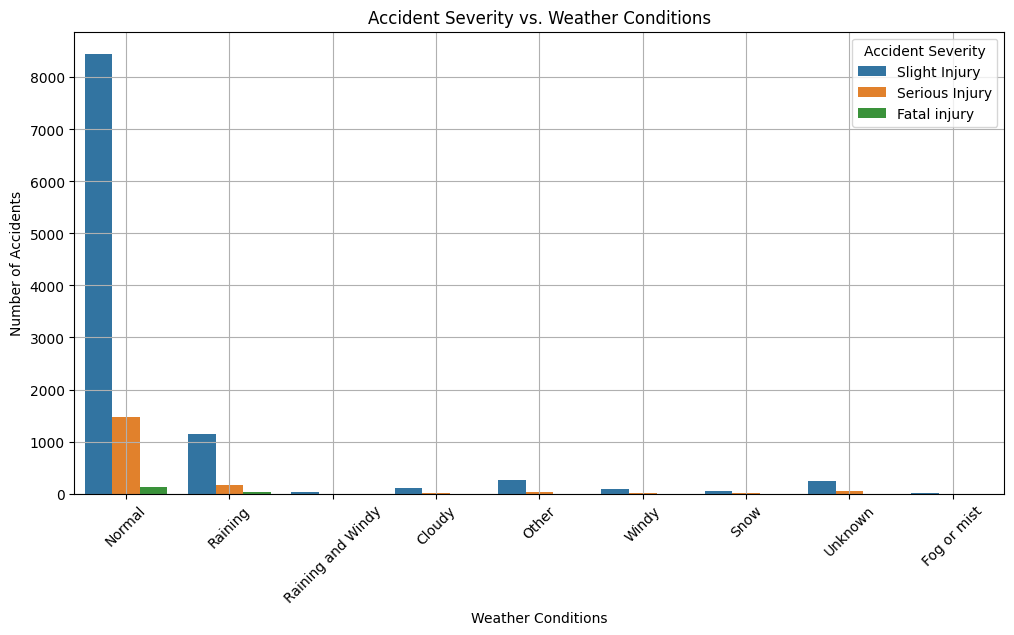

In [104]:
# Accident Severity vs. Weather Conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Weather_conditions', hue='Accident_severity')
plt.title('Accident Severity vs. Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

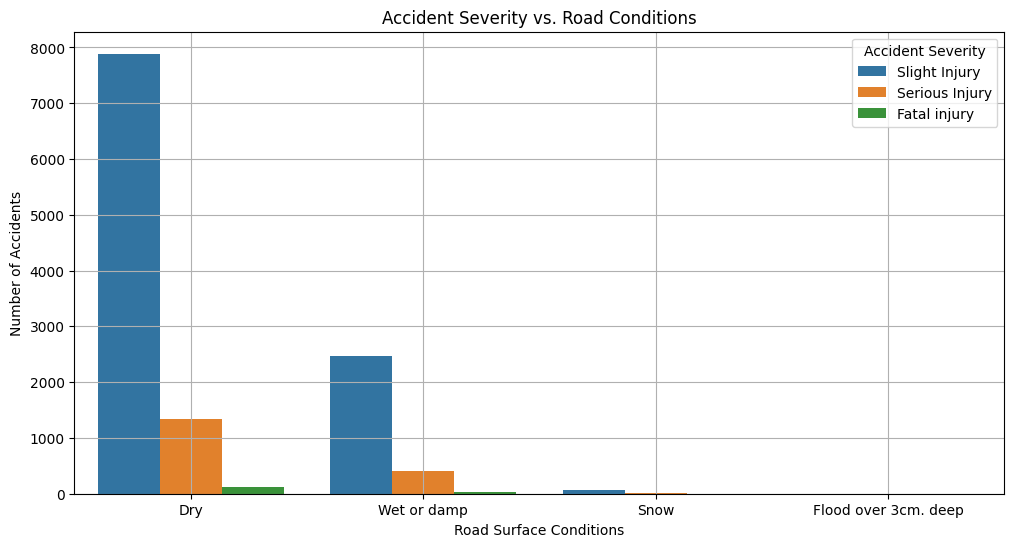

In [105]:
# Accident Severity vs. Road Conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Road_surface_conditions', hue='Accident_severity')
plt.title('Accident Severity vs. Road Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.grid(True)
plt.show()

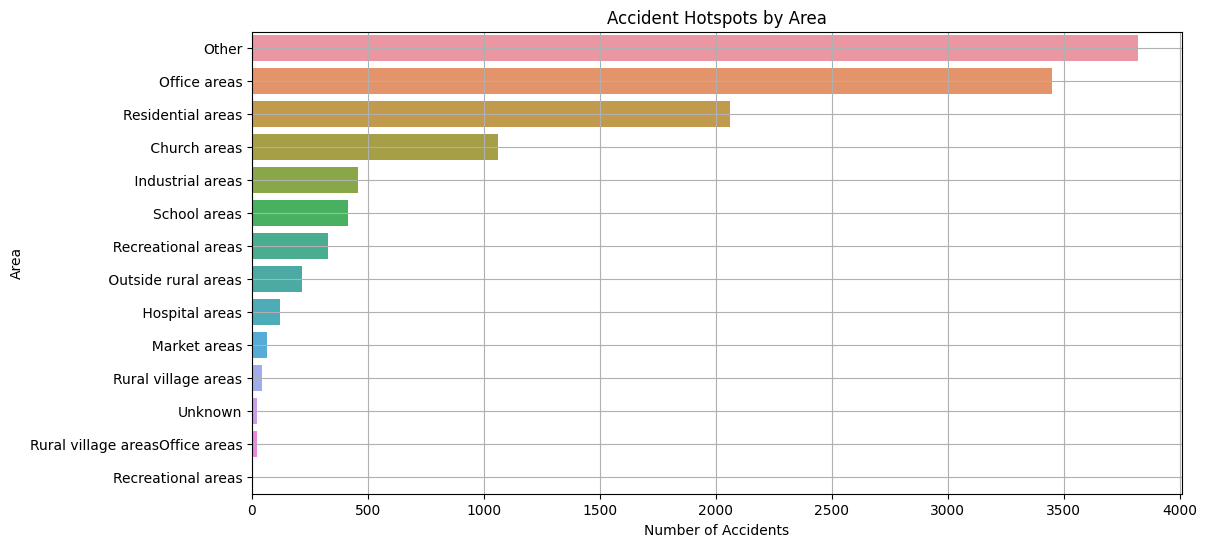

In [106]:
# Accident Hotspots Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, y='Area_accident_occured', order=df_cleaned['Area_accident_occured'].value_counts().index)
plt.title('Accident Hotspots by Area')
plt.xlabel('Number of Accidents')
plt.ylabel('Area')
plt.grid(True)
plt.show()

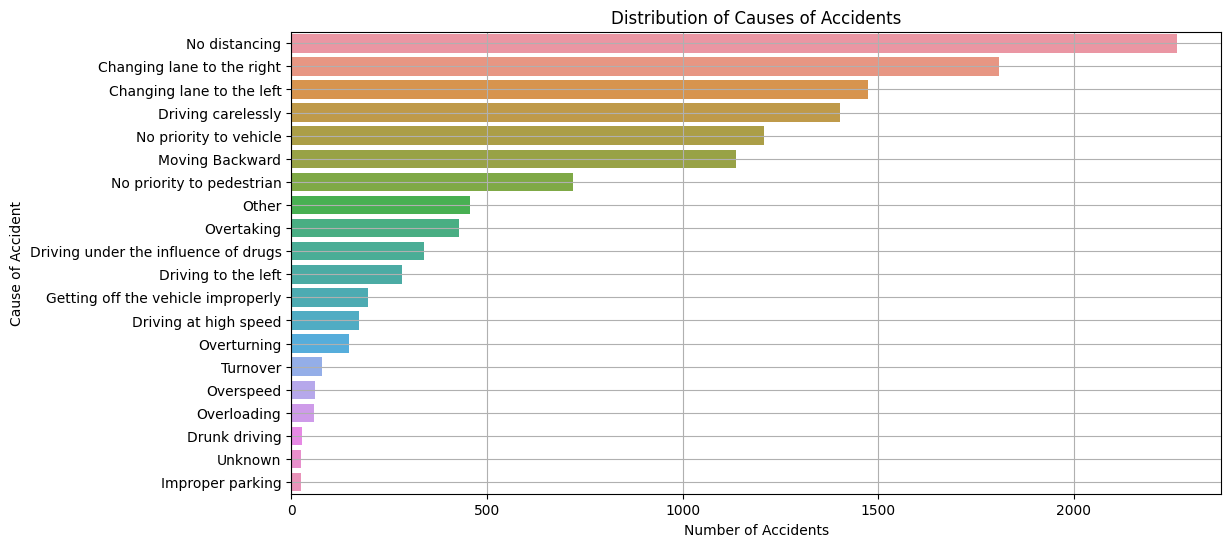

In [107]:
# Distribution of Causes of Accidents
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, y='Cause_of_accident', order=df_cleaned['Cause_of_accident'].value_counts().index)
plt.title('Distribution of Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause of Accident')
plt.grid(True)
plt.show()